# Algoritmos predictivos

Predecir la calidad de una app (rating/estrellas)

Tipo de predicción: **regresión**

## Librerias

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Dataset

In [2]:
df = pd.read_csv("GooglePlayStoreFE.csv", engine='python', encoding='utf-8', error_bad_lines=False)

/var/folders/28/24dngf7d6n36_8l0n_hsjj900000gn/T/ipykernel_76101/3023763804.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("GooglePlayStoreFE.csv", engine='python', encoding='utf-8', error_bad_lines=False)


In [3]:
df.head()

,Unnamed: 0,Rating,Rating.Count,Maximum.Installs,Price,Size.mb,Free,Ad.Supported,In.App.Purchases,Editors.Choice,ReleasedDA,Last.UpdatedDA,Category,Minimum.Andorid,Developer.Id,Content.Rating
0,1,0.0,0,15.0,0.0,10.0,1,0,0,0,490,490,Adventure,7.1,Jean Confident Irénée NIYIZIBYOSE,Everyone
1,2,4.4,64,7662.0,0.0,2.9,1,1,0,0,405,55,Tools,5.0,Webserveis,Everyone
2,3,0.0,0,58.0,0.0,3.7,1,0,0,0,691,681,Productivity,4.0.3,Cabin Crew,Everyone
3,4,5.0,5,19.0,0.0,1.8,1,1,0,0,1024,991,Communication,4.0.3,Climate Smart Tech2,Everyone
4,5,0.0,0,89.0,0.0,46.0,1,0,1,0,919,558,Social,6.0,Imocci GmbH,Teen


In [4]:
df=df.drop(['Rating.Count'], axis=1)

In [5]:
df.columns

Index(['Unnamed: 0', 'Rating', 'Maximum.Installs', 'Price', 'Size.mb', 'Free',
       'Ad.Supported', 'In.App.Purchases', 'Editors.Choice', 'ReleasedDA',
       'Last.UpdatedDA', 'Category', 'Minimum.Andorid', 'Developer.Id',
       'Content.Rating'],
      dtype='object')

In [6]:
df = df.rename(columns={'Maximum.Installs':'MaximumInstalls',
                        'Size.mb':'SizeMB',
                        'Ad.Supported':'AdSupported',
                        'In.App.Purchases':'InAppPurchases',
                        'Editors.Choice':'EditorsChoice',
                        'Last.UpdatedDA':'LastUpdatedDA',
                        'Minimum.Andorid':'MinimumAndroid',
                        'Developer.Id':'DeveloperId',
                        'Content.Rating':'ContentRating'})

df.columns

Index(['Unnamed: 0', 'Rating', 'MaximumInstalls', 'Price', 'SizeMB', 'Free',
       'AdSupported', 'InAppPurchases', 'EditorsChoice', 'ReleasedDA',
       'LastUpdatedDA', 'Category', 'MinimumAndroid', 'DeveloperId',
       'ContentRating'],
      dtype='object')

In [7]:
df.shape

(2225319, 15)

Como la variable target es Rating y el fin de este modelo es poner un rating distinto de cero a las apps que no tienen, voy a quitar todos los registros con Rating 0.

In [8]:
df = df.drop(df[df['Rating']==0].index)

In [9]:
df.shape

(1196055, 15)

## Encoding

**ContentRating**: Ordinal encoding
1. Everyone
2. Everyone 10+
3. Teen
4. Mature 17+
5. Adults only 18+


In [10]:
cont = {'Everyone' : 1,
        'Everyone 10+' : 2,
        'Teen' : 3,
        'Mature 17+' : 4,
        'Adults only 18+' : 5}
df['ContentRatingOrdinal']=df.ContentRating.map(cont)
df

,Unnamed: 0,Rating,MaximumInstalls,Price,SizeMB,Free,AdSupported,InAppPurchases,EditorsChoice,ReleasedDA,LastUpdatedDA,Category,MinimumAndroid,DeveloperId,ContentRating,ContentRatingOrdinal
1,2,4.4,7662.0,0.0,2.9,1,1,0,0,405,55,Tools,5.0,Webserveis,Everyone,1
3,4,5.0,19.0,0.0,1.8,1,1,0,0,1024,991,Communication,4.0.3,Climate Smart Tech2,Everyone,1
5,6,4.5,2567.0,0.0,2.5,1,1,0,0,646,642,Libraries & Demo,4.1,android developer779,Everyone,1
6,7,2.0,702.0,0.0,16.0,1,0,0,0,740,740,Lifestyle,5.0,Mozaix LLC,Everyone,1
7,8,4.7,62433.0,0.0,3.5,1,1,0,0,647,266,Personalization,4.1,Free 2021 Themes for Emoji keyboard,Everyone,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225309,2225310,4.3,7274660.0,0.0,37.0,1,1,1,0,2071,1577,Action,4.0.3,Upopa Games,Teen,3
2225310,2225311,4.0,814548.0,0.0,4.1,1,0,0,0,2393,2393,Music & Audio,2.2,Single Cell Software,Everyone,1
2225314,2225315,3.4,1980.0,0.0,10.0,1,1,0,0,1135,929,Education,4.1,Julio Augusto Vera,Everyone,1
2225317,2225318,3.5,2635.0,0.0,10.0,1,1,0,0,1794,56,Music & Audio,5.0,Bhakti,Everyone,1


**DeveloperId**: Frenquency encoding

In [11]:
fe=df.groupby('DeveloperId').size()/len(df)
df.loc[:,'Dev_freq_encode']=df['DeveloperId'].map(fe)
df

,Unnamed: 0,Rating,MaximumInstalls,Price,SizeMB,Free,AdSupported,InAppPurchases,EditorsChoice,ReleasedDA,LastUpdatedDA,Category,MinimumAndroid,DeveloperId,ContentRating,ContentRatingOrdinal,Dev_freq_encode
1,2,4.4,7662.0,0.0,2.9,1,1,0,0,405,55,Tools,5.0,Webserveis,Everyone,1,7.524738e-06
3,4,5.0,19.0,0.0,1.8,1,1,0,0,1024,991,Communication,4.0.3,Climate Smart Tech2,Everyone,1,1.672164e-06
5,6,4.5,2567.0,0.0,2.5,1,1,0,0,646,642,Libraries & Demo,4.1,android developer779,Everyone,1,1.672164e-06
6,7,2.0,702.0,0.0,16.0,1,0,0,0,740,740,Lifestyle,5.0,Mozaix LLC,Everyone,1,8.360820e-07
7,8,4.7,62433.0,0.0,3.5,1,1,0,0,647,266,Personalization,4.1,Free 2021 Themes for Emoji keyboard,Everyone,1,1.555112e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225309,2225310,4.3,7274660.0,0.0,37.0,1,1,1,0,2071,1577,Action,4.0.3,Upopa Games,Teen,3,4.180410e-06
2225310,2225311,4.0,814548.0,0.0,4.1,1,0,0,0,2393,2393,Music & Audio,2.2,Single Cell Software,Everyone,1,5.852574e-06
2225314,2225315,3.4,1980.0,0.0,10.0,1,1,0,0,1135,929,Education,4.1,Julio Augusto Vera,Everyone,1,8.360820e-07
2225317,2225318,3.5,2635.0,0.0,10.0,1,1,0,0,1794,56,Music & Audio,5.0,Bhakti,Everyone,1,7.859170e-05


In [12]:
print(df.Dev_freq_encode.max())
print(df.Dev_freq_encode.min())

0.001990711129504914
8.360819527530089e-07


**MinimumAndroid**: frenquency encoding

In [13]:
fe2=df.groupby('MinimumAndroid').size()/len(df)
df.loc[:,'Android_freq_encode']=df['MinimumAndroid'].map(fe2)
df

,Unnamed: 0,Rating,MaximumInstalls,Price,SizeMB,Free,AdSupported,InAppPurchases,EditorsChoice,ReleasedDA,LastUpdatedDA,Category,MinimumAndroid,DeveloperId,ContentRating,ContentRatingOrdinal,Dev_freq_encode,Android_freq_encode
1,2,4.4,7662.0,0.0,2.9,1,1,0,0,405,55,Tools,5.0,Webserveis,Everyone,1,7.524738e-06,0.162943
3,4,5.0,19.0,0.0,1.8,1,1,0,0,1024,991,Communication,4.0.3,Climate Smart Tech2,Everyone,1,1.672164e-06,0.079761
5,6,4.5,2567.0,0.0,2.5,1,1,0,0,646,642,Libraries & Demo,4.1,android developer779,Everyone,1,1.672164e-06,0.284611
6,7,2.0,702.0,0.0,16.0,1,0,0,0,740,740,Lifestyle,5.0,Mozaix LLC,Everyone,1,8.360820e-07,0.162943
7,8,4.7,62433.0,0.0,3.5,1,1,0,0,647,266,Personalization,4.1,Free 2021 Themes for Emoji keyboard,Everyone,1,1.555112e-04,0.284611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225309,2225310,4.3,7274660.0,0.0,37.0,1,1,1,0,2071,1577,Action,4.0.3,Upopa Games,Teen,3,4.180410e-06,0.079761
2225310,2225311,4.0,814548.0,0.0,4.1,1,0,0,0,2393,2393,Music & Audio,2.2,Single Cell Software,Everyone,1,5.852574e-06,0.013077
2225314,2225315,3.4,1980.0,0.0,10.0,1,1,0,0,1135,929,Education,4.1,Julio Augusto Vera,Everyone,1,8.360820e-07,0.284611
2225317,2225318,3.5,2635.0,0.0,10.0,1,1,0,0,1794,56,Music & Audio,5.0,Bhakti,Everyone,1,7.859170e-05,0.162943


In [14]:
print(df.Android_freq_encode.max())
print(df.Android_freq_encode.min())

0.2846114936186045
8.026386746428885e-05


**Category**: Binary encoding

In [15]:
#conda install -c conda-forge category_encoders

In [16]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['Category'])
dfbin = encoder.fit_transform(df['Category'])
df = pd.concat([df,dfbin], axis=1)
df

,Unnamed: 0,Rating,MaximumInstalls,Price,SizeMB,Free,AdSupported,InAppPurchases,EditorsChoice,ReleasedDA,...,ContentRating,ContentRatingOrdinal,Dev_freq_encode,Android_freq_encode,Category_0,Category_1,Category_2,Category_3,Category_4,Category_5
1,2,4.4,7662.0,0.0,2.9,1,1,0,0,405,...,Everyone,1,7.524738e-06,0.162943,0,0,0,0,0,1
3,4,5.0,19.0,0.0,1.8,1,1,0,0,1024,...,Everyone,1,1.672164e-06,0.079761,0,0,0,0,1,0
5,6,4.5,2567.0,0.0,2.5,1,1,0,0,646,...,Everyone,1,1.672164e-06,0.284611,0,0,0,0,1,1
6,7,2.0,702.0,0.0,16.0,1,0,0,0,740,...,Everyone,1,8.360820e-07,0.162943,0,0,0,1,0,0
7,8,4.7,62433.0,0.0,3.5,1,1,0,0,647,...,Everyone,1,1.555112e-04,0.284611,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225309,2225310,4.3,7274660.0,0.0,37.0,1,1,1,0,2071,...,Teen,3,4.180410e-06,0.079761,1,0,1,0,0,0
2225310,2225311,4.0,814548.0,0.0,4.1,1,0,0,0,2393,...,Everyone,1,5.852574e-06,0.013077,0,1,0,1,0,0
2225314,2225315,3.4,1980.0,0.0,10.0,1,1,0,0,1135,...,Everyone,1,8.360820e-07,0.284611,0,1,1,0,0,0
2225317,2225318,3.5,2635.0,0.0,10.0,1,1,0,0,1794,...,Everyone,1,7.859170e-05,0.162943,0,1,0,1,0,0


In [17]:
df_original = df

In [18]:
df_original.columns

Index(['Unnamed: 0', 'Rating', 'MaximumInstalls', 'Price', 'SizeMB', 'Free',
       'AdSupported', 'InAppPurchases', 'EditorsChoice', 'ReleasedDA',
       'LastUpdatedDA', 'Category', 'MinimumAndroid', 'DeveloperId',
       'ContentRating', 'ContentRatingOrdinal', 'Dev_freq_encode',
       'Android_freq_encode', 'Category_0', 'Category_1', 'Category_2',
       'Category_3', 'Category_4', 'Category_5'],
      dtype='object')

In [19]:
df= df.drop(['Unnamed: 0', 'Category', 'MinimumAndroid', 'DeveloperId', 'ContentRating'], axis=1)

## Separación Test & Train

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X= df[['MaximumInstalls',
       'Price',
       'SizeMB', 'Free', 'AdSupported', 'InAppPurchases', 'EditorsChoice',
       'ReleasedDA', 'LastUpdatedDA','ContentRatingOrdinal',
       'Dev_freq_encode', 'Android_freq_encode', 'Category_0', 'Category_1',
       'Category_2', 'Category_3', 'Category_4', 'Category_5']]
y= df[['Rating']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(956844, 18)
(956844, 1)
(239211, 18)
(239211, 1)


## Matriz de correlación

In [48]:
corr_df = df.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,Rating,MaximumInstalls,Price,SizeMB,Free,AdSupported,InAppPurchases,EditorsChoice,ReleasedDA,LastUpdatedDA,ContentRatingOrdinal,Dev_freq_encode,Android_freq_encode,Category_0,Category_1,Category_2,Category_3,Category_4,Category_5
Rating,1.000000,0.002017,0.002722,-0.002780,-0.008937,0.027852,-0.016847,0.008726,-0.096612,-0.045949,-0.008975,0.083737,0.032665,-0.044932,0.075634,-0.029518,0.010692,-0.073633,-0.022201
MaximumInstalls,0.002017,1.000000,-0.000909,0.009618,0.002636,0.000947,0.017027,0.060023,0.023770,-0.012238,0.005953,0.002032,0.008830,0.005417,-0.007298,-0.004052,0.000129,0.004471,0.000993
Price,0.002722,-0.000909,1.000000,0.009910,-0.341353,-0.053055,-0.002822,0.001267,0.045388,0.014300,-0.000362,-0.006511,-0.007288,0.009506,-0.001860,-0.003782,-0.001992,-0.001468,0.002344
SizeMB,-0.002780,0.009618,0.009910,1.000000,-0.011549,-0.023571,0.209427,0.052595,-0.128679,-0.208097,0.080840,0.033601,0.017020,0.184343,-0.035297,0.081268,0.023983,0.040892,-0.068356
Free,-0.008937,0.002636,-0.341353,-0.011549,1.000000,0.153578,0.009944,-0.004504,-0.134704,-0.085210,0.010992,0.014987,0.033357,-0.026121,0.032376,0.015884,-0.021355,0.018918,-0.022487
AdSupported,0.027852,0.000947,-0.053055,-0.023571,0.153578,1.000000,0.130675,0.004134,-0.101391,-0.019023,0.105060,0.000906,0.105027,0.074593,-0.088689,-0.003754,0.071637,-0.079205,-0.056173
InAppPurchases,-0.016847,0.017027,-0.002822,0.209427,0.009944,0.130675,1.000000,0.050169,0.020585,-0.083685,0.089527,-0.014584,0.030942,0.160079,-0.077724,0.063608,0.015257,0.017094,0.010089
EditorsChoice,0.008726,0.060023,0.001267,0.052595,-0.004504,0.004134,0.050169,1.000000,0.019356,-0.020168,0.014404,-0.004416,0.003974,0.019937,-0.007350,0.007926,0.001246,-0.001121,-0.005318
ReleasedDA,-0.096612,0.023770,0.045388,-0.128679,-0.134704,-0.101391,0.020585,0.019356,1.000000,0.482669,-0.060191,0.069195,-0.183475,-0.050222,0.025170,-0.062341,0.056577,0.009551,0.063057
LastUpdatedDA,-0.045949,-0.012238,0.014300,-0.208097,-0.085210,-0.019023,-0.083685,-0.020168,0.482669,1.000000,-0.063768,-0.011701,-0.286371,0.003584,-0.045093,-0.009966,0.013997,-0.009326,0.023640


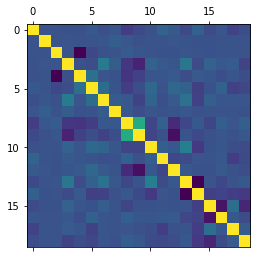

In [49]:
plt.matshow(corr_df)
plt.show()

## Modelos a probar
+ Histogram gradient boosting
+ Light GBM
+ Arbol simple
+ Extra trees
+ Random Forrest
+ KNN

## Histogram Gradient Boosting

In [109]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [110]:
m=HistGradientBoostingRegressor(random_state=0)

In [111]:
m.fit(X_train, y_train)

/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingRegressor(random_state=0)

In [112]:
m.score(X_test,y_test)

0.1887794810340513

In [97]:
m.get_params()

{'categorical_features': None,
 'early_stopping': 'auto',
 'l2_regularization': 0.0,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_bins': 255,
 'max_depth': None,
 'max_iter': 100,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 20,
 'monotonic_cst': None,
 'n_iter_no_change': 10,
 'random_state': 0,
 'scoring': 'loss',
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

#### Ajuste de hiperparametros

In [96]:
parameters = [{'learning_rate': [0.01, 0.05, 0.1, 0.2], 'max_depth':[4, 6, 10, 12], 'min_samples_leaf':[1, 5, 15, 50, 200], 'max_leaf_nodes': [11,31,51,101]}]
clf = GridSearchCV(m, parameters, cv=2)
clf.fit(X, y)

/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: D

GridSearchCV(cv=2, estimator=HistGradientBoostingRegressor(random_state=0),
             param_grid=[{'learning_rate': [0.01, 0.05, 0.1, 0.2],
                          'max_depth': [4, 6, 10, 12],
                          'max_leaf_nodes': [11, 31, 51, 101],
                          'min_samples_leaf': [1, 5, 15, 50, 200]}])

In [97]:
clf.best_score_

0.20999381218818508

In [98]:
clf.best_params_

{'learning_rate': 0.2,
 'max_depth': 12,
 'max_leaf_nodes': 101,
 'min_samples_leaf': 200}

In [99]:
parameters = [{'learning_rate': [0.2, 0.3], 'max_depth':[12, 14], 'min_samples_leaf':[200, 300], 'max_leaf_nodes': [101, 201]}]
clf = GridSearchCV(m, parameters, cv=2)
clf.fit(X, y)

/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: D

GridSearchCV(cv=2, estimator=HistGradientBoostingRegressor(random_state=0),
             param_grid=[{'learning_rate': [0.2, 0.3], 'max_depth': [12, 14],
                          'max_leaf_nodes': [101, 201],
                          'min_samples_leaf': [200, 300]}])

In [100]:
clf.best_score_

0.21507724699024267

In [101]:
clf.best_params_

{'learning_rate': 0.2,
 'max_depth': 14,
 'max_leaf_nodes': 201,
 'min_samples_leaf': 200}

In [102]:
m=HistGradientBoostingRegressor(learning_rate=0.2, random_state=0)

In [103]:
parameters = [{'max_depth':[14, 16], 'min_samples_leaf':[200, 250], 'max_leaf_nodes': [201,251,301]}]
clf = GridSearchCV(m, parameters, cv=4)
clf.fit(X, y)

/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: D

GridSearchCV(cv=4,
             estimator=HistGradientBoostingRegressor(learning_rate=0.2,
                                                     random_state=0),
             param_grid=[{'max_depth': [14, 16],
                          'max_leaf_nodes': [201, 251, 301],
                          'min_samples_leaf': [200, 250]}])

In [104]:
clf.best_score_

0.22330259226120944

In [105]:
clf.best_params_

{'max_depth': 16, 'max_leaf_nodes': 301, 'min_samples_leaf': 200}

In [107]:
m=HistGradientBoostingRegressor(learning_rate=0.2, random_state=0,min_samples_leaf=200, max_leaf_nodes=10001)

In [108]:
parameters = [{'max_depth':[16, 18, 20]}]
clf = GridSearchCV(m, parameters, cv=4)
clf.fit(X, y)

/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: D

GridSearchCV(cv=4,
             estimator=HistGradientBoostingRegressor(learning_rate=0.2,
                                                     max_leaf_nodes=10001,
                                                     min_samples_leaf=200,
                                                     random_state=0),
             param_grid=[{'max_depth': [16, 18, 20]}])

In [109]:
clf.best_score_

0.22405603010753541

In [110]:
clf.best_params_

{'max_depth': 16}

In [98]:
m=HistGradientBoostingRegressor(learning_rate=0.2, random_state=0,min_samples_leaf=200, max_depth=16)

In [99]:
parameters = [{'max_leaf_nodes':[301,10001, 500001, 1000001]}]
clf = GridSearchCV(m, parameters, cv=4)
clf.fit(X, y)

/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: D

GridSearchCV(cv=4,
             estimator=HistGradientBoostingRegressor(learning_rate=0.2,
                                                     max_depth=16,
                                                     min_samples_leaf=200,
                                                     random_state=0),
             param_grid=[{'max_leaf_nodes': [301, 10001, 500001, 1000001]}])

In [100]:
clf.best_score_

0.22405603010753541

In [101]:
clf.best_params_

{'max_leaf_nodes': 10001}

Modelo (casi) final con Histogram Grad Boost

In [113]:
m1=HistGradientBoostingRegressor(learning_rate=0.2, random_state=0,min_samples_leaf=200, max_depth=16, max_leaf_nodes=10001)

In [114]:
m1.fit(X_train, y_train)

/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingRegressor(learning_rate=0.2, max_depth=16,
                              max_leaf_nodes=10001, min_samples_leaf=200,
                              random_state=0)

In [115]:
m1.score(X_test, y_test)

0.224711114357373

In [116]:
y_pred = m1.predict(X_test)

In [117]:
# Maximum residual error.
from sklearn.metrics import max_error
max_error(y_test, y_pred)
# best value is 0

3.977307561783169

In [118]:
# Mean absolute error regression loss.
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)
# best value is 0

0.444913489149891

In [119]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.224711114357373

Para ver la feature importance de este modelo, no pude encontrar una manera de hacer desde sklearn.
Como este algoritmo está inspirado en lightGBM, lo voy a replicar en este para sacar la feature importance.

In [124]:
m2 = LGBMRegressor(random_state=0,learning_rate=0.2,min_samples_leaf=200, max_depth=16, max_leaf_nodes=10001)
m2.fit(X_train, y_train)
print("Test Score: {}".format(m2.score(X_test,y_test)))

Test Score: 0.1988346263626838


In [127]:
tabla= pd.DataFrame(m2.feature_name_)
tabla = tabla.rename(columns={0:'Feature name'})
tabla['Feature importance']=m2.feature_importances_
tabla.sort_values(['Feature importance'], ascending=False)

,Feature name,Feature importance
10,Dev_freq_encode,537
0,MaximumInstalls,353
7,ReleasedDA,321
2,SizeMB,304
8,LastUpdatedDA,298
11,Android_freq_encode,208
16,Category_4,117
4,AdSupported,117
14,Category_2,110
17,Category_5,109


In [133]:
m1.get_params()

{'categorical_features': None,
 'early_stopping': 'auto',
 'l2_regularization': 0.0,
 'learning_rate': 0.2,
 'loss': 'squared_error',
 'max_bins': 255,
 'max_depth': 16,
 'max_iter': 100,
 'max_leaf_nodes': 10001,
 'min_samples_leaf': 200,
 'monotonic_cst': None,
 'n_iter_no_change': 10,
 'random_state': 0,
 'scoring': 'loss',
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [134]:
parameters = [{'l2_regularization': [0.0, 0.5, 1, 10]}]
clf1 = GridSearchCV(m1, parameters, cv=2)
clf1.fit(X, y)

/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: D

{'l2_regularization': 10}

In [135]:
clf1.best_score_

0.21688737546842718

In [136]:
clf1.best_params_

{'l2_regularization': 10}

In [138]:
parameters = {'l2_regularization': [10, 15, 20]}
clf2 = GridSearchCV(m1, parameters, cv=2)
clf2.fit(X, y)

/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: D

GridSearchCV(cv=2,
             estimator=HistGradientBoostingRegressor(learning_rate=0.2,
                                                     max_depth=16,
                                                     max_leaf_nodes=10001,
                                                     min_samples_leaf=200,
                                                     random_state=0),
             param_grid={'l2_regularization': [10, 15, 20]})

In [142]:
clf2.best_score_

0.21707237650865607

In [143]:
clf2.best_params_

{'l2_regularization': 15}

In [144]:
parameters = {'l2_regularization': [15], 'max_depth':[16, 18, 20 ,30]}
clf3 = GridSearchCV(m1, parameters, cv=2)
clf3.fit(X, y)

/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: D

GridSearchCV(cv=2,
             estimator=HistGradientBoostingRegressor(learning_rate=0.2,
                                                     max_depth=16,
                                                     max_leaf_nodes=10001,
                                                     min_samples_leaf=200,
                                                     random_state=0),
             param_grid={'l2_regularization': [15],
                         'max_depth': [16, 18, 20, 30]})

In [145]:
clf3.best_score_

0.21707237650865607

In [146]:
clf3.best_params_

{'l2_regularization': 15, 'max_depth': 16}

In [147]:
parameters = {'loss': ['squared_error', 'absolute_error', 'poisson', 'quantile']}
clf4 = GridSearchCV(m1, parameters, cv=3)
clf4.fit(X, y)

/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: D

GridSearchCV(cv=3,
             estimator=HistGradientBoostingRegressor(learning_rate=0.2,
                                                     max_depth=16,
                                                     max_leaf_nodes=10001,
                                                     min_samples_leaf=200,
                                                     random_state=0),
             param_grid={'loss': ['squared_error', 'absolute_error', 'poisson',
                                  'quantile']})

In [148]:
clf4.best_score_

0.22253250803344657

In [149]:
clf4.best_params_

{'loss': 'squared_error'}

In [156]:
parameters = {'max_bins': [245, 255, 265], 'max_iter': [70,80,90]}
clf5 = GridSearchCV(m1, parameters, cv=3)
clf5.fit(X, y)

/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: D

GridSearchCV(cv=3,
             estimator=HistGradientBoostingRegressor(learning_rate=0.2,
                                                     max_depth=16,
                                                     max_leaf_nodes=10001,
                                                     min_samples_leaf=200,
                                                     random_state=0),
             param_grid={'max_bins': [245, 255, 265], 'max_iter': [70, 80, 90]})

In [157]:
clf5.best_score_

0.22260995183464027

In [158]:
clf5.best_params_

{'max_bins': 255, 'max_iter': 90}

## Mejor modelo

In [162]:
m3=HistGradientBoostingRegressor(learning_rate=0.2, random_state=0,min_samples_leaf=200, max_depth=16, max_leaf_nodes=10001)
#, max_iter=90)

In [163]:
m3.fit(X_train, y_train)

/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HistGradientBoostingRegressor(learning_rate=0.2, max_depth=16,
                              max_leaf_nodes=10001, min_samples_leaf=200,
                              random_state=0)

In [164]:
m3.score(X_test, y_test)

0.224711114357373

Metricas

In [171]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error

In [166]:
y_pred=m3.predict(X_test)

In [167]:
explained_variance_score(y_test, y_pred)
#best is 1.0

0.22471286534818413

In [170]:
median_absolute_error(y_test, y_pred)
#best is 0.0

0.3416121467259332

In [172]:
mean_absolute_error(y_test, y_pred)
#best is 0.0


0.444913489149891

Residual plot

In [182]:
y_pred.view()

array([4.42229257, 3.97535637, 4.79510351, ..., 3.86412032, 4.15483114,
       4.11996169])

In [185]:
y_test['Rating']

2165530    5.0
666267     2.8
2104572    3.5
1247750    5.0
974080     4.4
          ... 
1561088    4.4
380420     3.5
1472679    3.8
2058501    4.3
74626      4.2
Name: Rating, Length: 239211, dtype: float64

In [186]:
residuals = y_test['Rating']-y_pred

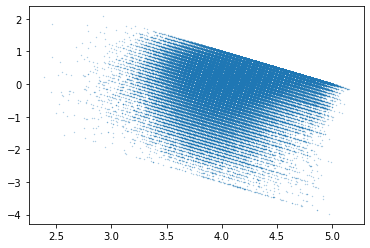

In [201]:
plt.scatter(y_pred,residuals, s=0.05)#.xlabel('Residuos').ylabel('Predicción')
plt.show()

/var/folders/28/24dngf7d6n36_8l0n_hsjj900000gn/T/ipykernel_76101/4261703782.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


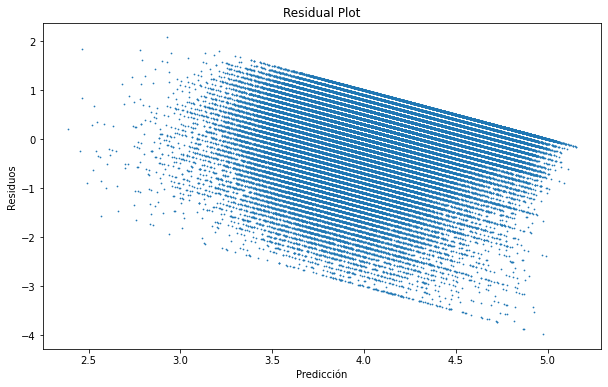

In [203]:
fig , ax1 = plt.subplots(figsize=(10,6))
ax1.set_title("Residual Plot") #titulo
ax1.set_xlabel('Predicción') #nombre del eje x
ax1.set_ylabel('Residuos') #nombre del eje y

ax1.scatter(y_pred,residuals, s=0.5)

fig.show()

/var/folders/28/24dngf7d6n36_8l0n_hsjj900000gn/T/ipykernel_76101/2921989725.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


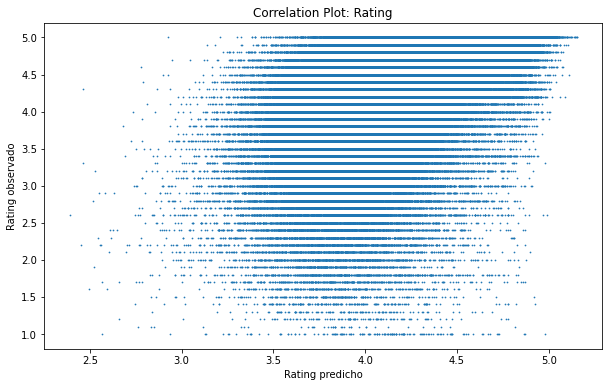

In [205]:
fig , ax1 = plt.subplots(figsize=(10,6))
ax1.set_title("Correlation Plot: Rating") #titulo
ax1.set_xlabel('Rating predicho') #nombre del eje x
ax1.set_ylabel('Rating observado') #nombre del eje y

ax1.scatter(y_pred,y_test['Rating'], s=0.5)

fig.show()

## Arbol simple

In [29]:
from sklearn.tree import DecisionTreeRegressor  

In [30]:
regressor = DecisionTreeRegressor(random_state=0, max_depth=10).fit(X_train,y_train)

In [31]:
regressor.score(X_test,y_test)

0.16272285904582973

In [32]:
regressor.get_n_leaves()

943

## KNN

In [33]:
from sklearn.neighbors import KNeighborsRegressor

In [34]:
neigh = KNeighborsRegressor(n_neighbors=100, algorithm='kd_tree',weights ='distance', metric = 'manhattan')

In [35]:
neigh.fit(X_train, y_train)

KNeighborsRegressor(algorithm='kd_tree', metric='manhattan', n_neighbors=100,
                    weights='distance')

In [36]:
neigh.score(X_test, y_test)

0.10508380214830204

## Random Forest

In [86]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
regr = RandomForestRegressor(max_depth=10, random_state=0)

In [88]:
regr.fit(X_train, y_train)

/var/folders/28/24dngf7d6n36_8l0n_hsjj900000gn/T/ipykernel_66253/848189701.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=0)

In [89]:
regr.score(X_test, y_test)

0.17427501925935807

In [90]:
regr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

## Extra Trees

In [73]:
from sklearn.ensemble import ExtraTreesRegressor

In [74]:
reg = ExtraTreesRegressor(n_estimators=100, random_state=0)
reg.fit(X_train, y_train)

/var/folders/28/24dngf7d6n36_8l0n_hsjj900000gn/T/ipykernel_68771/3580887855.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


ExtraTreesRegressor(random_state=0)

In [75]:
reg.score(X_test, y_test)

0.18081013690456738

In [76]:
reg.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

#### Ajuste de hiperparametros

In [79]:
parameters = [{'n_estimators': [100, 200, 500], 'max_depth':[6,10], 'min_samples_leaf':[1, 5, 15, 205]}]
clf = GridSearchCV(reg, parameters, cv=2)
clf.fit(X, y)

#max_features

/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/camilacollado/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/camilacollado/opt/miniconda

GridSearchCV(cv=2, estimator=ExtraTreesRegressor(random_state=0),
             param_grid=[{'max_depth': [6, 10],
                          'min_samples_leaf': [1, 5, 15, 205],
                          'n_estimators': [100, 200, 500]}])

In [80]:
clf.best_score_

0.08149088064535903

In [81]:
clf.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 200}

In [86]:
reg = ExtraTreesRegressor(random_state=0)
#, max_depth=10, n_estimators= 200)
reg.fit(X_train, y_train)

/var/folders/28/24dngf7d6n36_8l0n_hsjj900000gn/T/ipykernel_68771/1558111246.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


ExtraTreesRegressor(random_state=0)

In [87]:
reg.score(X_test, y_test)

0.18081013690456738

## Light GBM

In [39]:
#conda install -c conda-forge lightgbm

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 4.13.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/camilacollado/opt/miniconda3/envs/myenv

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bzip2-1.0.8                |       h3422bc3_4         148 KB  conda-forge
    certifi-2022.6.15          |   py39h2804cbe_0         155 KB  conda-forge
    libzlib-1.2.12             |       ha287fd2_1          48 KB  conda-forge
    lightgbm-3.3.2             |   py39h8685b90_0         1.0 MB  conda-forge
    python-3.9.13              |hc596b02_0_cpython        12.2 MB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    sqlite-3.39.0              |       h40d

In [23]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [24]:
LGB = LGBMRegressor(random_state=0)
LGB.fit(X_train, y_train)
print("Test Score: {}".format(LGB.score(X_test,y_test)))

Test Score: 0.18920082738994892


In [25]:
LGB.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 0,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [26]:
tabla= pd.DataFrame(LGB.feature_name_)

In [126]:
tabla = tabla.rename(columns={0:'Feature name'})
tabla['Feature importance']=LGB.feature_importances_
tabla.sort_values('Feature importance', ascending=False)

,Feature name,Feature importance
10,Dev_freq_encode,506
0,MaximumInstalls,352
7,ReleasedDA,294
8,LastUpdatedDA,272
2,SizeMB,245
11,Android_freq_encode,224
16,Category_4,146
15,Category_3,128
4,AdSupported,125
5,InAppPurchases,114


#### Ajuste de hiperparametros

In [29]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = [{'boosting_type': ['gbdt', 'dart', 'goss','rf']}]
clf = GridSearchCV(LGB, parameters, cv=3)
clf.fit(X, y)

In [ ]:
clf.best_score_

0.19076995845034775

In [ ]:
clf.best_params_

{'boosting_type': 'goss'}

goss = Gradient-based One-Side Sampling

In [ ]:
LGB = LGBMRegressor(random_state=0, boosting_type='goss')

In [152]:
parameters = [{'learning_rate': [0.1, 0.05, 0.001,0.2,0.3], 'n_estimators': [100, 300, 500]}]
clf = GridSearchCV(LGB, parameters, cv=3)
clf.fit(X, y)

GridSearchCV(cv=3,
             estimator=LGBMRegressor(boosting_type='goss', random_state=0),
             param_grid=[{'learning_rate': [0.1, 0.05, 0.001, 0.2, 0.3],
                          'n_estimators': [100, 300, 500]}])

In [153]:
clf.best_score_

0.20920736922691285

In [154]:
clf.best_params_

{'learning_rate': 0.2, 'n_estimators': 500}

In [159]:
clf.cv_results_

{'mean_fit_time': array([ 2.63494674,  5.87006966,  8.77303235,  2.45196462,  6.21024259,
         9.59941673,  2.58902637,  8.34828035, 13.85960094,  2.31619906,
         5.25765689,  8.37111449,  2.15200901,  5.04488325,  8.40614629]),
 'std_fit_time': array([0.08843277, 0.20559016, 0.23715963, 0.00725644, 0.3387019 ,
        0.42760096, 0.03104221, 0.23853463, 0.25611534, 0.15305809,
        0.12431939, 0.21891353, 0.11156025, 0.02642853, 0.18523281]),
 'mean_score_time': array([0.55123727, 1.19844564, 1.70259595, 0.49806801, 1.34647711,
        1.94265326, 0.31927896, 1.05154371, 1.88709434, 0.4137663 ,
        1.0529054 , 1.77726158, 0.38055801, 1.01881989, 1.70982122]),
 'std_score_time': array([0.04983352, 0.05767226, 0.03061637, 0.02292192, 0.11623821,
        0.08511125, 0.02006333, 0.05972676, 0.06860585, 0.01976347,
        0.01932664, 0.1133434 , 0.0256745 , 0.0427733 , 0.01193442]),
 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.001, 0.001, 0

In [161]:
LGB2 = LGBMRegressor(random_state=0, boosting_type='goss', learning_rate=0.2)

In [163]:
parameters = [{'num_leaves': [11, 21, 31, 51], 'n_estimators': [500, 750, 1000]}]
clf = GridSearchCV(LGB2, parameters, cv=3)
clf.fit(X, y)

GridSearchCV(cv=3,
             estimator=LGBMRegressor(boosting_type='goss', learning_rate=0.2,
                                     random_state=0),
             param_grid=[{'n_estimators': [500, 750, 1000],
                          'num_leaves': [11, 21, 31, 51]}])

In [164]:
clf.best_score_

0.20934616341016346

In [165]:
clf.best_params_

{'n_estimators': 750, 'num_leaves': 31}

In [31]:
LGB3 = LGBMRegressor(random_state=0, boosting_type='goss', learning_rate=0.2, num_leaves=31)

In [38]:
parameters = [{'n_estimators': [690, 700, 720]}]
clf = GridSearchCV(LGB3, parameters, cv=3)
clf.fit(X, y)

GridSearchCV(cv=3,
             estimator=LGBMRegressor(boosting_type='goss', learning_rate=0.2,
                                     random_state=0),
             param_grid=[{'n_estimators': [690, 700, 720]}])

In [39]:
clf.best_score_

0.20937290211999196

In [40]:
clf.best_params_

{'n_estimators': 690}

In [41]:
LGB31 = LGBMRegressor(random_state=0, boosting_type='goss', learning_rate=0.2, num_leaves=31, n_estimators=690 )

In [42]:
parameters = [{'max_depth': [14, 16, 18]}]
clf = GridSearchCV(LGB31, parameters, cv=3)
clf.fit(X, y)

GridSearchCV(cv=3,
             estimator=LGBMRegressor(boosting_type='goss', learning_rate=0.2,
                                     n_estimators=690, random_state=0),
             param_grid=[{'max_depth': [14, 16, 18]}])

In [43]:
clf.best_score_

0.209773527749169

In [44]:
clf.best_params_

{'max_depth': 16}

In [52]:
LGB4 = LGBMRegressor(random_state=0, learning_rate=0.2, num_leaves=31, n_estimators=700, max_depth=16)

In [53]:
LGB4.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.2, max_depth=16, n_estimators=700, random_state=0)

In [54]:
LGB4.score(X_test, y_test)

0.21973652041873137

In [64]:
parameters = [{'min_data_in_leaf': [90,100,110]}]
clf = GridSearchCV(LGB4, parameters, cv=3)
clf.fit(X, y)

[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=110, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=110
[LightGBM] [Warning] min_data_in_leaf is set=110, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=110
[LightGBM] [Warning] min_data_in_leaf is set=110, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=110
[LightGBM] [

GridSearchCV(cv=3,
             estimator=LGBMRegressor(learning_rate=0.2, max_depth=16,
                                     n_estimators=700, random_state=0),
             param_grid=[{'min_data_in_leaf': [90, 100, 110]}])

In [65]:
clf.best_score_

0.2198376495849008

In [66]:
clf.best_params_

{'min_data_in_leaf': 100}

In [77]:
LGB5=LGBMRegressor(random_state=0, learning_rate=0.2, num_leaves=31, n_estimators=700, max_depth=16, min_data_in_leaf= 100)

In [78]:
LGB5.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


LGBMRegressor(learning_rate=0.2, max_depth=16, min_data_in_leaf=100,
              n_estimators=700, random_state=0)

In [84]:
LGB5.score(X_test, y_test)

0.2198020886130283

In [85]:
parameters = [{'max_bin': [255,500,700], 'boosting_type': ['gbdt', 'dart'] }]
clf = GridSearchCV(LGB5, parameters, cv=3)
clf.fit(X, y)

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGB

GridSearchCV(cv=3,
             estimator=LGBMRegressor(learning_rate=0.2, max_depth=16,
                                     min_data_in_leaf=100, n_estimators=700,
                                     random_state=0),
             param_grid=[{'boosting_type': ['gbdt', 'dart'],
                          'max_bin': [255, 500, 700]}])

In [86]:
clf.best_score_

0.2198376495849008

In [87]:
clf.best_params_
#quedaron como mejores los default

{'boosting_type': 'gbdt', 'max_bin': 255}

In [91]:
clf.cv_results_

{'mean_fit_time': array([  6.82925971,   5.72457329,   5.73650789, 351.91638621,
        518.8552111 , 217.95849331]),
 'std_fit_time': array([3.43901400e-01, 6.31378808e-02, 3.88804609e-02, 1.05549753e+02,
        4.39300529e+02, 8.12889541e+00]),
 'mean_score_time': array([1.69405961, 1.71148062, 1.75469502, 3.28159332, 3.06689938,
        3.404809  ]),
 'std_score_time': array([0.06257234, 0.04624249, 0.04743169, 0.23774651, 0.08742011,
        0.3337873 ]),
 'param_boosting_type': masked_array(data=['gbdt', 'gbdt', 'gbdt', 'dart', 'dart', 'dart'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_bin': masked_array(data=[255, 500, 700, 255, 500, 700],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'boosting_type': 'gbdt', 'max_bin': 255},
  {'boosting_type': 'gbdt', 'max_bin': 500},
  {'boosting_type': 'gbdt', 'max_bin': 700},

Light GBM final: LGB5

In [90]:
tabla= pd.DataFrame(LGB5.feature_name_)
tabla = tabla.rename(columns={0:'Feature name'})
tabla['Feature importance']=LGB5.feature_importances_
tabla.sort_values('Feature importance', ascending=False)

,Feature name,Feature importance
10,Dev_freq_encode,3152
0,MaximumInstalls,3028
7,ReleasedDA,2946
8,LastUpdatedDA,2935
2,SizeMB,2916
11,Android_freq_encode,1463
17,Category_5,584
4,AdSupported,561
16,Category_4,544
15,Category_3,518


## XGBoost

In [50]:
! pip install xgboost
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [54]:
Xgb = XGBRegressor(random_state=0)


In [ ]:
Xgb.fit(X_train,y_train)

In [56]:
print("Test Score: {}".format(Xgb.score(X_test,y_test)))

Test Score: 0.1998805644142797


In [ ]:
Xgb.get_params()

#### Ajuste de hiperparametros

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
parameters = [{'booster': ['gbtree', 'gblinear', 'dart']}]
clf = GridSearchCV(Xgb, parameters, cv=2)
clf.fit(X_train, y_train)

[17:19:02] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:19:04] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-3.8/xgboost/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constra

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=0, gpu_id=-1, grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_bin=256,
                                    max_cat_to_onehot=4, max_delta_step=0,
                                    max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_p

In [60]:
clf.best_score_

0.19676238464965123

In [61]:
clf.best_params_

{'booster': 'gbtree'}

In [62]:
Xgb = XGBRegressor(random_state=0, booster='gbtree')

In [65]:
Xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 0,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [63]:
parameters = [{'n_estimators': [100, 500, 1000], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth':[6, 10]}]
clf = GridSearchCV(Xgb, parameters, cv=2)
clf.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=1

In [64]:
clf.best_score_

0.21362015271735424

In [66]:
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500}

In [68]:
Xgb2 = XGBRegressor(random_state=0, booster='gbtree', learning_rate=0.1, n_estimators=500, max_depth=10)

In [69]:
parameters = [{'subsample': [0.25, 0.5, 1], 'gamma': [0, 5, 10]}]
clf = GridSearchCV(Xgb2, parameters, cv=2)
clf.fit(X, y)

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster='gbtree',
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=10, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=500,

In [70]:
clf.best_score_

0.21832026107296637

In [71]:
clf.best_params_

{'gamma': 0, 'subsample': 1}